## Import libraries

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import splitfolders as spfd
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D,Input,Dense,Conv2D,Add,SeparableConv2D,ReLU,BatchNormalization,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from prettytable import PrettyTable

from tqdm import tqdm

## Google Colab
Jalankan cell ini jika menggunakan google colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

## Dataset

In [2]:
#dataset = 'D:/Latihan/Dataset'
dataset = "D:/Latihan/Dataset - Copy"

## Exploratory Data Analysis & Data preparation

Menunjukkan Jumlah Image tiap Kelas

In [3]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [6]:
d = {'Class': os.listdir(dataset), 'Total_image_in_class': np.delete(list, [0])}
data1 = pd.DataFrame(data=d)
data1

,Class,Total_image_in_class
0,Acne,250
1,Cancer,249
2,Eksim,250
3,Normal,250
4,Rosacea,250


Menunjukkan persebaran data tiap kelas melalui bar plot

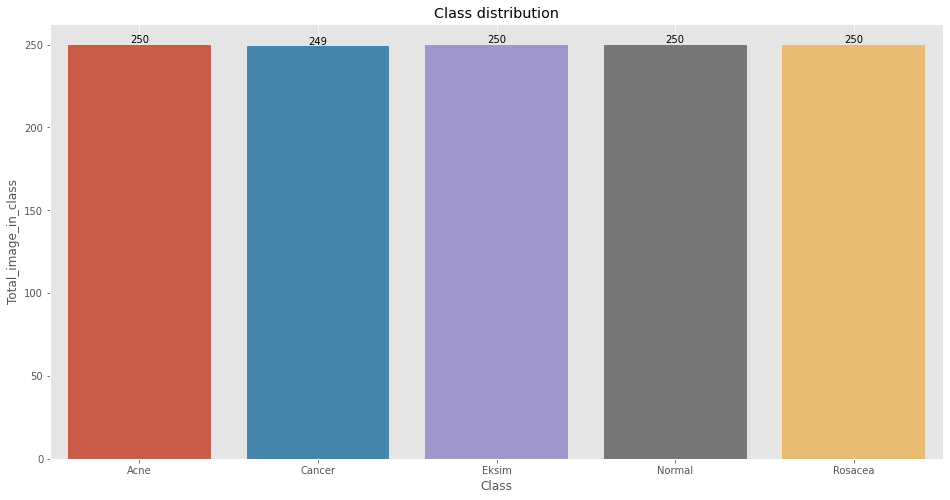

In [184]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data1,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [8]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data1)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data1['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 5
Jumlah total gambar dalam dataset adalah 1249


Melakukan EDA lebih dalam lagi

In [9]:
filenames = []
folder = []
image = []
shape = []
x = []
y = []

for path, subdirs, files in tqdm(os.walk(dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]
        
for i in range (len(filenames)) :
    shape += [cv2.imread(filenames[i]).shape[0:2]]

for i in range (len(filenames)) :
    x += [shape[i][0]]
    y += [shape[i][1]]

new_ip = []
for i in range(len(filenames)) :
    new = filenames[i].replace("\\", "/")
    new_ip.append(new)
    
data2 = pd.DataFrame({'Image path':new_ip, 'Class':folder, 'Name_Image':image})

6it [00:00, 399.72it/s]


In [10]:
extension = []
for i in range (sum(data1['Total_image_in_class'])) :
    strValue = data2['Name_Image'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [11]:
data2['Class_num'] = pd.factorize(data2['Class'])[0]
data2['Extension'] = extension
data2['Shape(x,y)'] = shape
data2['x'] = x
data2['y'] = y
data2

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
0,D:/Latihan/Dataset - Copy/Acne/008907VB.jpg,Acne,008907VB.jpg,0,.jpg,"(430, 260)",430,260
1,D:/Latihan/Dataset - Copy/Acne/008911VB.jpg,Acne,008911VB.jpg,0,.jpg,"(430, 260)",430,260
2,D:/Latihan/Dataset - Copy/Acne/008938HB.jpg,Acne,008938HB.jpg,0,.jpg,"(1181, 1640)",1181,1640
3,D:/Latihan/Dataset - Copy/Acne/032200VB.jpg,Acne,032200VB.jpg,0,.jpg,"(448, 260)",448,260
4,D:/Latihan/Dataset - Copy/Acne/032206VB.jpg,Acne,032206VB.jpg,0,.jpg,"(448, 260)",448,260
...,...,...,...,...,...,...,...,...
1244,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-5.jpg,4,.jpg,"(480, 720)",480,720
1245,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-6.jpg,4,.jpg,"(480, 720)",480,720
1246,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-7.jpg,4,.jpg,"(480, 720)",480,720
1247,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-8.jpg,4,.jpg,"(480, 720)",480,720


Dataframe diatas akan kita lakukan sort terhadap kolom x dan y

In [12]:
data2.sort_values(by=['x','y'])

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
945,D:/Latihan/Dataset - Copy/Normal/0197.jpg,Normal,0197.jpg,3,.jpg,"(129, 114)",129,114
842,D:/Latihan/Dataset - Copy/Normal/0094.jpg,Normal,0094.jpg,3,.jpg,"(136, 116)",136,116
909,D:/Latihan/Dataset - Copy/Normal/0161.jpg,Normal,0161.jpg,3,.jpg,"(143, 185)",143,185
822,D:/Latihan/Dataset - Copy/Normal/0074.jpg,Normal,0074.jpg,3,.jpg,"(144, 131)",144,131
984,D:/Latihan/Dataset - Copy/Normal/0236.jpg,Normal,0236.jpg,3,.jpg,"(146, 139)",146,139
...,...,...,...,...,...,...,...,...
1058,D:/Latihan/Dataset - Copy/Rosacea/r51.jpg,Rosacea,r51.jpg,4,.jpg,"(2379, 2751)",2379,2751
638,D:/Latihan/Dataset - Copy/Eksim/d56.jpg,Eksim,d56.jpg,2,.jpg,"(2448, 3024)",2448,3024
946,D:/Latihan/Dataset - Copy/Normal/0198.jpg,Normal,0198.jpg,3,.jpg,"(2600, 2570)",2600,2570
627,D:/Latihan/Dataset - Copy/Eksim/d44.jpg,Eksim,d44.jpg,2,.jpg,"(3088, 2320)",3088,2320


In [13]:
print("Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x={} dan y{}".format(min(x),min(y)))

Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x=129 dan y112


Kita buang gambar dalam dataset yang ukurannya kurang dari (180,180)

In [14]:
df_filtered = data2[(data2['x'] >= 180) & (data2['y'] >= 180)]
df_filtered

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
0,D:/Latihan/Dataset - Copy/Acne/008907VB.jpg,Acne,008907VB.jpg,0,.jpg,"(430, 260)",430,260
1,D:/Latihan/Dataset - Copy/Acne/008911VB.jpg,Acne,008911VB.jpg,0,.jpg,"(430, 260)",430,260
2,D:/Latihan/Dataset - Copy/Acne/008938HB.jpg,Acne,008938HB.jpg,0,.jpg,"(1181, 1640)",1181,1640
3,D:/Latihan/Dataset - Copy/Acne/032200VB.jpg,Acne,032200VB.jpg,0,.jpg,"(448, 260)",448,260
4,D:/Latihan/Dataset - Copy/Acne/032206VB.jpg,Acne,032206VB.jpg,0,.jpg,"(448, 260)",448,260
...,...,...,...,...,...,...,...,...
1244,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-5.jpg,4,.jpg,"(480, 720)",480,720
1245,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-6.jpg,4,.jpg,"(480, 720)",480,720
1246,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-7.jpg,4,.jpg,"(480, 720)",480,720
1247,D:/Latihan/Dataset - Copy/Rosacea/rosacea-nose...,Rosacea,rosacea-nose-8.jpg,4,.jpg,"(480, 720)",480,720


Melihat kembali persebaran dataset kita

In [15]:
data3 = df_filtered.groupby('Class').count().rename({'Class_num': 'Total_image_in_class'}, axis='columns')
data3['Total_image_in_class']

Class
Acne       250
Cancer     249
Eksim      250
Normal     165
Rosacea    250
Name: Total_image_in_class, dtype: int64

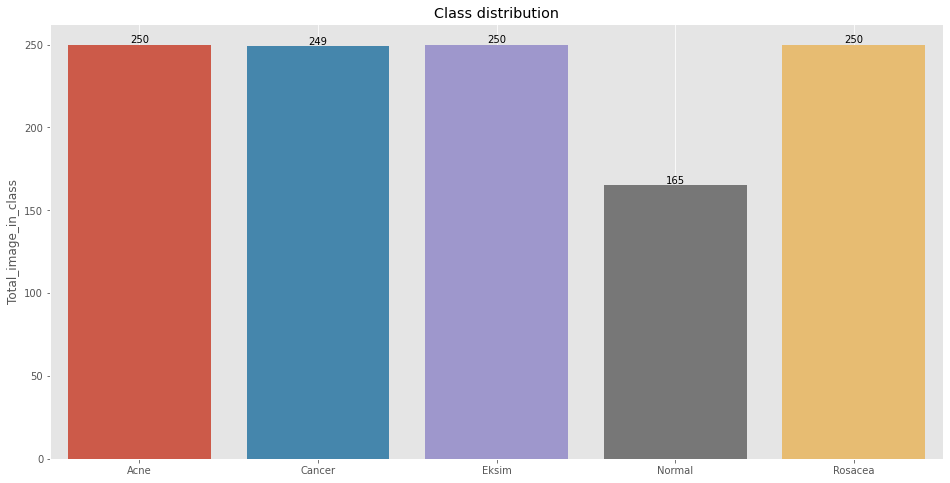

In [185]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data3,x=data3.index.get_level_values(0).tolist(), y='Total_image_in_class')
plt.title('Class distribution')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [17]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data3)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data3['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 5
Jumlah total gambar dalam dataset adalah 1164


Persebaran data dari tiap kelas kurang merata

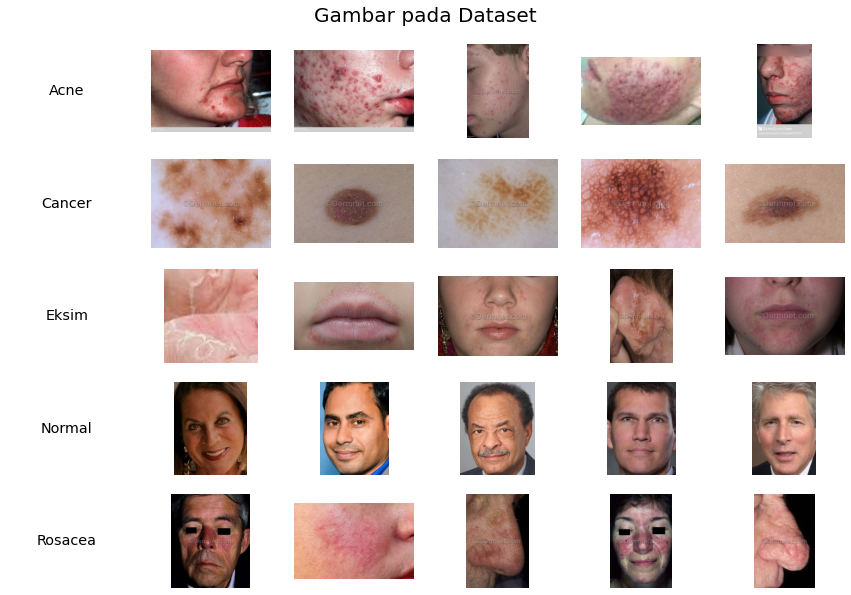

In [19]:
unique_list = []
unique = df_filtered.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()
fig = plt.figure(figsize=(15, 10))
plt.title('Gambar pada Dataset', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 5
img2show = df_filtered.groupby('Class').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Image path'])
        #kelas = img2show.iloc[i-1]['Class']
        imgplot = plt.imshow(img)
        plt.axis('off')
        #plt.title(f'{kelas}')
plt.show()

## Data Splitting

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filtered,
                                                    df_filtered['Class'], 
                                                    test_size=0.1, random_state=2022, stratify = df_filtered['Class'])

## Modelling

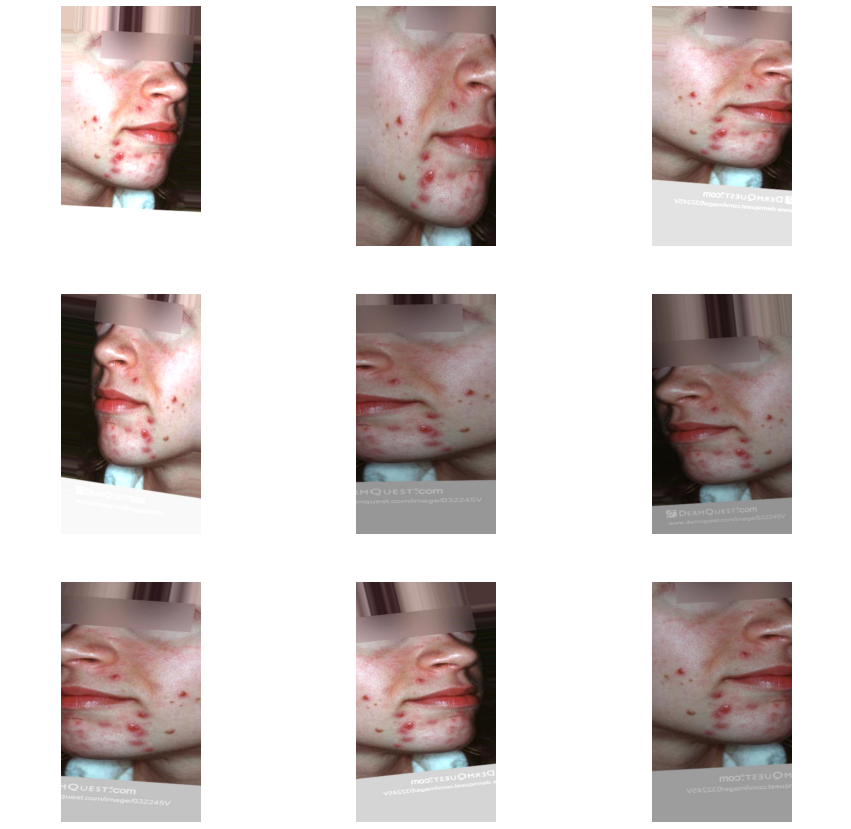

In [21]:
# Example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# load the image
img = load_img("D:/Latihan/Dataset - Copy/Acne/032245VB.jpg")
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(            rotation_range=10,
                                         zoom_range=0.4,
                                         horizontal_flip=True,
                                         brightness_range=[0.5,1.4],
                                         width_shift_range=0.1, 
                                         height_shift_range=0.1,
                             )
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot


fig = plt.figure(figsize=(15, 15))
plt.axis('off')
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    batch = it.next()

    image = batch[0].astype('uint8')

    fig.add_subplot(rows, columns, i)
    imgplot = plt.imshow(image)
    
    plt.axis('off')
plt.show()

In [132]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   rescale=1/255,
                                   brightness_range=[0.4,1.5],
                                   width_shift_range=0.1,
                                   height_shift_range=0.1) 
    
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [133]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

list_model = [EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, 
              EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
              InceptionV3, MobileNet, MobileNetV2, NASNetMobile, NASNetLarge, 
              ResNet50, ResNet50V2, VGG16, VGG19
             ]

def load_pretrained_model(model_name, input_shape, include_top, weights, pooling) :
    pretrained_model = model_name(include_top = include_top,
                                  input_shape = input_shape, 
                                  weights =  weights,
                                  pooling = pooling
                                 )
    print("Using {} pretrained_model with input_shape = {}".format(model_name, input_shape))
    return pretrained_model

In [134]:
##################################################
# Define input to load_pretrained_model function #
##################################################

n = 8 #Masukkan angka dari 0-16
model_name = list_model[n] #Tidak perlu diubah-ubah
input_shape = (180,180, 3)
include_top = False
weights = 'imagenet'
pooling = 'avg'

##################################################

pretrained_model= load_pretrained_model(model_name, input_shape, include_top, weights, pooling)
#pretrained_model.trainable = False
for layer in pretrained_model.layers:
        layer.trainable=False

Using <function InceptionV3 at 0x0000015853F554C0> pretrained_model with input_shape = (180, 180, 3)


In [135]:
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 89, 89, 32)  96          ['conv2d[0][0]']                 
 rmalization)                                                                                     
                                                                                       

In [186]:
def getModel():
    model = Sequential()
    model.add(pretrained_model),

    model.add(Flatten()),
    model.add(BatchNormalization()),
    model.add(Dense(128, activation='relu')),
    model.add(Dense(5, activation='softmax'))
    
    return model

In [187]:
getModel().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 22,073,893
Trainable params: 267,013
Non-trainable params: 21,806,880
____________________________________

In [188]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def scheduler(epoch, lr):
    if epoch <= 60:
        return lr 
    else:
        return lr * tf.math.exp(-0.1)

In [189]:
def plot_result(history, epoch, title):
    plt.style.use('ggplot')

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    f1 = history.history['f1']
    val_f1 = history.history['val_f1']

    learning_rate = history.history['lr']

    epochs_range = range(epoch)

    fig = plt.figure(figsize=(18, 8))
    st = fig.suptitle(title, fontsize=20, y=0.6)
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 2, 3)
    plt.plot(epochs_range, f1, label='Training F1')
    plt.plot(epochs_range, val_f1, label='Validation F1')
    plt.legend(loc='lower right')
    plt.title('Training and Validation F1')

    plt.subplot(2, 2, 4)
    plt.plot(epochs_range, learning_rate)
    plt.title('Learning Rate')

    st.set_y(0.95)
    plt.show()

In [190]:
from sklearn.model_selection import StratifiedKFold
# ===============Stratified K-Fold======================
num_fold = 5
skf = StratifiedKFold(n_splits=num_fold, shuffle=True, random_state=2022)
skf.get_n_splits(X_train, y_train)

5

In [191]:
# Membuat list untuk menampung semua metrics
accuracy = []
val_accuracy = []

loss = []
val_loss = []

f_1 = []
val_f1 = []

Fold 1/5

Found 837 validated image filenames belonging to 5 classes.
Found 210 validated image filenames belonging to 5 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 17s 483ms/step - loss: 1.0794 - accuracy: 0.6619 - f1: 0.6570 - val_loss: 0.8154 - val_accuracy: 0.7000 - val_f1: 0.6932 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 11s 415ms/step - loss: 0.5394 - accuracy: 0.8017 - f1: 0.8025 - val_loss: 0.7932 - val_accuracy: 0.7238 - val_f1: 0.7190 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 11s 411ms/step - loss: 0.4940 - accuracy: 0.8315 - f1: 0.8222 - val_loss: 0.6081 - val_accuracy: 0.7905 - val_f1: 0.7724 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rate

27/27 [==============================] - 11s 406ms/step - loss: 0.2195 - accuracy: 0.9164 - f1: 0.9135 - val_loss: 0.4850 - val_accuracy: 0.8381 - val_f1: 0.8445 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
27/27 [==============================] - 11s 411ms/step - loss: 0.1899 - accuracy: 0.9379 - f1: 0.9256 - val_loss: 0.5772 - val_accuracy: 0.8286 - val_f1: 0.8102 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
27/27 [==============================] - 11s 408ms/step - loss: 0.2567 - accuracy: 0.9128 - f1: 0.9093 - val_loss: 0.4369 - val_accuracy: 0.8429 - val_f1: 0.8552 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
27/27 [==============================] - 11s 407ms/step - loss: 0.2216 - accuracy: 0.9140 - f1: 0.9118 - val_loss: 0.5151 - val_accuracy: 0.8476 - val_f1: 0.8623 - lr: 0.0010

Epoch 00

27/27 [==============================] - 11s 406ms/step - loss: 0.1180 - accuracy: 0.9534 - f1: 0.9523 - val_loss: 0.4765 - val_accuracy: 0.8571 - val_f1: 0.8606 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
27/27 [==============================] - 11s 407ms/step - loss: 0.1225 - accuracy: 0.9630 - f1: 0.9583 - val_loss: 0.5045 - val_accuracy: 0.8571 - val_f1: 0.8689 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
27/27 [==============================] - 11s 406ms/step - loss: 0.1362 - accuracy: 0.9558 - f1: 0.9545 - val_loss: 0.4557 - val_accuracy: 0.8762 - val_f1: 0.8823 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
27/27 [==============================] - 11s 410ms/step - loss: 0.1320 - accuracy: 0.9498 - f1: 0.9469 - val_loss: 0.4420 - va

27/27 [==============================] - 11s 406ms/step - loss: 0.0974 - accuracy: 0.9725 - f1: 0.9703 - val_loss: 0.3973 - val_accuracy: 0.8667 - val_f1: 0.8760 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
27/27 [==============================] - 11s 413ms/step - loss: 0.0571 - accuracy: 0.9797 - f1: 0.9802 - val_loss: 0.3948 - val_accuracy: 0.8667 - val_f1: 0.8759 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
27/27 [==============================] - 11s 413ms/step - loss: 0.0806 - accuracy: 0.9689 - f1: 0.9715 - val_loss: 0.3925 - val_accuracy: 0.8619 - val_f1: 0.8711 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
27/27 [==============================] - 11s 411ms/step - loss: 0.0799 - accuracy: 0.9701 

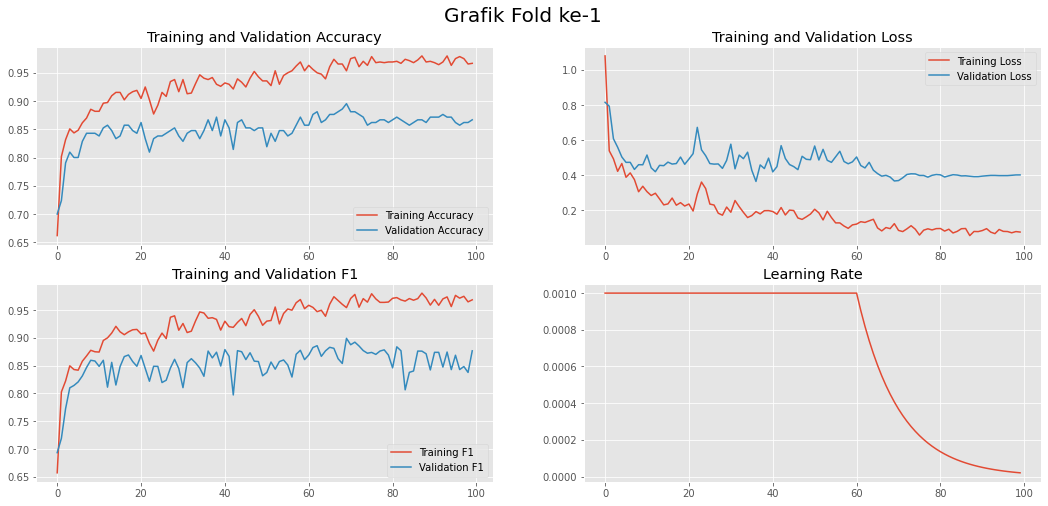


Fold 2/5

Found 837 validated image filenames belonging to 5 classes.
Found 210 validated image filenames belonging to 5 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 16s 445ms/step - loss: 1.0274 - accuracy: 0.6679 - f1: 0.6517 - val_loss: 0.9434 - val_accuracy: 0.6619 - val_f1: 0.6303 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 11s 416ms/step - loss: 0.6120 - accuracy: 0.7730 - f1: 0.7790 - val_loss: 0.7959 - val_accuracy: 0.7095 - val_f1: 0.6926 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 11s 413ms/step - loss: 0.4827 - accuracy: 0.8280 - f1: 0.8212 - val_loss: 0.6003 - val_accuracy: 0.7905 - val_f1: 0.7779 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

27/27 [==============================] - 11s 413ms/step - loss: 0.2138 - accuracy: 0.9271 - f1: 0.9272 - val_loss: 0.4886 - val_accuracy: 0.8524 - val_f1: 0.8646 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
27/27 [==============================] - 11s 416ms/step - loss: 0.2455 - accuracy: 0.9200 - f1: 0.9145 - val_loss: 0.5173 - val_accuracy: 0.8476 - val_f1: 0.8529 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
27/27 [==============================] - 11s 415ms/step - loss: 0.1715 - accuracy: 0.9415 - f1: 0.9369 - val_loss: 0.6028 - val_accuracy: 0.8190 - val_f1: 0.8331 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
27/27 [==============================] - 11s 415ms/step - loss: 0.2413 - accuracy: 0.9104 - f1: 0.9007 - val_loss: 0.6740 - val_accuracy: 0.8286 - val_f1: 0.8412 - lr: 0.0010

Epoch 00

27/27 [==============================] - 11s 411ms/step - loss: 0.1471 - accuracy: 0.9618 - f1: 0.9634 - val_loss: 0.5381 - val_accuracy: 0.8571 - val_f1: 0.8679 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
27/27 [==============================] - 11s 410ms/step - loss: 0.1565 - accuracy: 0.9462 - f1: 0.9477 - val_loss: 0.5485 - val_accuracy: 0.8476 - val_f1: 0.8250 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
27/27 [==============================] - 11s 411ms/step - loss: 0.1262 - accuracy: 0.9558 - f1: 0.9587 - val_loss: 0.5271 - val_accuracy: 0.8762 - val_f1: 0.8834 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
27/27 [==============================] - 11s 412ms/step - loss: 0.1239 - accuracy: 0.9546 - f1: 0.9503 - val_loss: 0.5282 - va

27/27 [==============================] - 11s 426ms/step - loss: 0.0741 - accuracy: 0.9773 - f1: 0.9705 - val_loss: 0.4443 - val_accuracy: 0.8857 - val_f1: 0.8898 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
27/27 [==============================] - 11s 413ms/step - loss: 0.0741 - accuracy: 0.9737 - f1: 0.9639 - val_loss: 0.4400 - val_accuracy: 0.8857 - val_f1: 0.8580 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
27/27 [==============================] - 11s 417ms/step - loss: 0.0873 - accuracy: 0.9654 - f1: 0.9624 - val_loss: 0.4386 - val_accuracy: 0.8762 - val_f1: 0.8851 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
27/27 [==============================] - 11s 415ms/step - loss: 0.0809 - accuracy: 0.9749 

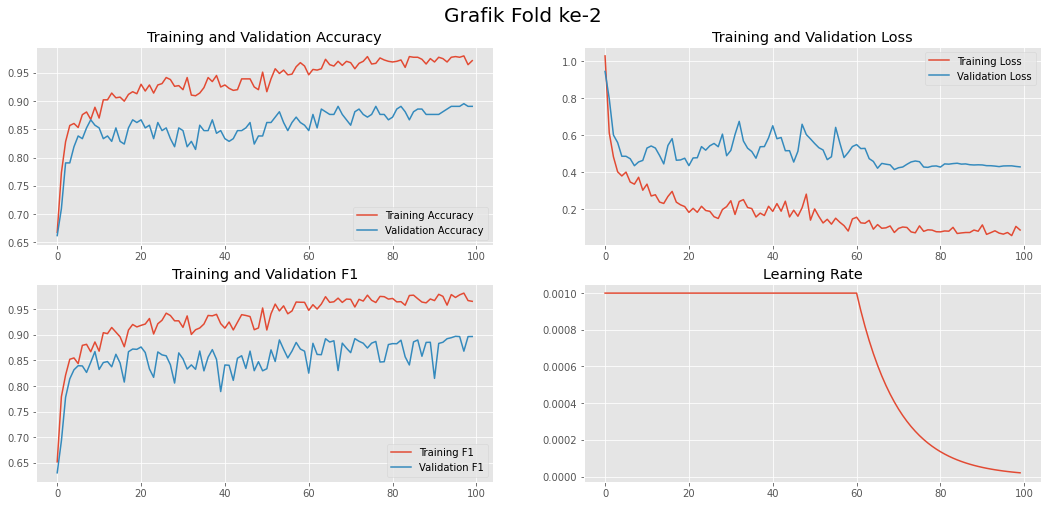


Fold 3/5

Found 838 validated image filenames belonging to 5 classes.
Found 209 validated image filenames belonging to 5 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 15s 452ms/step - loss: 0.9145 - accuracy: 0.6766 - f1: 0.6768 - val_loss: 1.4759 - val_accuracy: 0.5311 - val_f1: 0.5287 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 11s 421ms/step - loss: 0.6110 - accuracy: 0.7959 - f1: 0.7929 - val_loss: 0.8756 - val_accuracy: 0.6794 - val_f1: 0.6870 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 11s 414ms/step - loss: 0.5132 - accuracy: 0.8305 - f1: 0.8280 - val_loss: 0.7460 - val_accuracy: 0.7656 - val_f1: 0.7784 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

27/27 [==============================] - 11s 414ms/step - loss: 0.1311 - accuracy: 0.9547 - f1: 0.9563 - val_loss: 0.7117 - val_accuracy: 0.8086 - val_f1: 0.8264 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
27/27 [==============================] - 11s 411ms/step - loss: 0.1586 - accuracy: 0.9356 - f1: 0.9396 - val_loss: 0.7162 - val_accuracy: 0.7943 - val_f1: 0.7426 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
27/27 [==============================] - 11s 408ms/step - loss: 0.1990 - accuracy: 0.9320 - f1: 0.9186 - val_loss: 0.8643 - val_accuracy: 0.7895 - val_f1: 0.8089 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
27/27 [==============================] - 11s 405ms/step - loss: 0.1826 - accuracy: 0.9344 - f1: 0.9390 - val_loss: 0.8551 - val_accuracy: 0.8086 - val_f1: 0.7474 - lr: 0.0010

Epoch 00

27/27 [==============================] - 11s 398ms/step - loss: 0.1787 - accuracy: 0.9427 - f1: 0.9398 - val_loss: 0.7293 - val_accuracy: 0.8325 - val_f1: 0.8446 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
27/27 [==============================] - 11s 399ms/step - loss: 0.1643 - accuracy: 0.9391 - f1: 0.9419 - val_loss: 0.7366 - val_accuracy: 0.8182 - val_f1: 0.8332 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
27/27 [==============================] - 11s 405ms/step - loss: 0.1334 - accuracy: 0.9570 - f1: 0.9558 - val_loss: 0.7490 - val_accuracy: 0.8086 - val_f1: 0.8253 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
27/27 [==============================] - 11s 401ms/step - loss: 0.0962 - accuracy: 0.9654 - f1: 0.9668 - val_loss: 0.7213 - va

27/27 [==============================] - 11s 398ms/step - loss: 0.0611 - accuracy: 0.9773 - f1: 0.9735 - val_loss: 0.6162 - val_accuracy: 0.8469 - val_f1: 0.8553 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
27/27 [==============================] - 11s 399ms/step - loss: 0.0720 - accuracy: 0.9785 - f1: 0.9802 - val_loss: 0.6139 - val_accuracy: 0.8469 - val_f1: 0.8530 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
27/27 [==============================] - 11s 400ms/step - loss: 0.0875 - accuracy: 0.9690 - f1: 0.9705 - val_loss: 0.6068 - val_accuracy: 0.8517 - val_f1: 0.8616 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
27/27 [==============================] - 11s 397ms/step - loss: 0.0711 - accuracy: 0.9726 

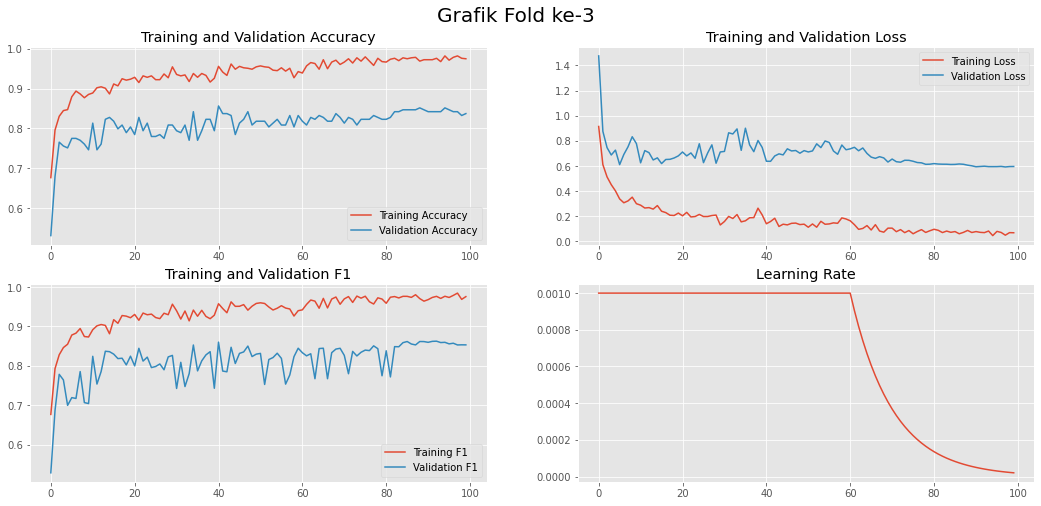


Fold 4/5

Found 838 validated image filenames belonging to 5 classes.
Found 209 validated image filenames belonging to 5 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 15s 441ms/step - loss: 1.0163 - accuracy: 0.6575 - f1: 0.6611 - val_loss: 0.7721 - val_accuracy: 0.7225 - val_f1: 0.6424 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 11s 396ms/step - loss: 0.5848 - accuracy: 0.7936 - f1: 0.7976 - val_loss: 0.6366 - val_accuracy: 0.7464 - val_f1: 0.7523 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 11s 400ms/step - loss: 0.5062 - accuracy: 0.8126 - f1: 0.8173 - val_loss: 0.5633 - val_accuracy: 0.7990 - val_f1: 0.8139 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

27/27 [==============================] - 11s 395ms/step - loss: 0.2285 - accuracy: 0.9117 - f1: 0.9117 - val_loss: 0.3409 - val_accuracy: 0.8756 - val_f1: 0.8875 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
27/27 [==============================] - 11s 398ms/step - loss: 0.1804 - accuracy: 0.9356 - f1: 0.9404 - val_loss: 0.4075 - val_accuracy: 0.8708 - val_f1: 0.8815 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
27/27 [==============================] - 11s 392ms/step - loss: 0.1547 - accuracy: 0.9547 - f1: 0.9520 - val_loss: 0.3987 - val_accuracy: 0.8469 - val_f1: 0.8642 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
27/27 [==============================] - 11s 394ms/step - loss: 0.1930 - accuracy: 0.9379 - f1: 0.9362 - val_loss: 0.3457 - val_accuracy: 0.8852 - val_f1: 0.8923 - lr: 0.0010

Epoch 00

27/27 [==============================] - 11s 405ms/step - loss: 0.1461 - accuracy: 0.9511 - f1: 0.9516 - val_loss: 0.3561 - val_accuracy: 0.8756 - val_f1: 0.8800 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
27/27 [==============================] - 11s 409ms/step - loss: 0.1248 - accuracy: 0.9487 - f1: 0.9529 - val_loss: 0.3539 - val_accuracy: 0.8947 - val_f1: 0.8986 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
27/27 [==============================] - 11s 413ms/step - loss: 0.1392 - accuracy: 0.9511 - f1: 0.9498 - val_loss: 0.3129 - val_accuracy: 0.8947 - val_f1: 0.8966 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
27/27 [==============================] - 11s 412ms/step - loss: 0.1660 - accuracy: 0.9403 - f1: 0.9417 - val_loss: 0.3203 - va

27/27 [==============================] - 11s 408ms/step - loss: 0.0763 - accuracy: 0.9809 - f1: 0.9814 - val_loss: 0.2845 - val_accuracy: 0.8852 - val_f1: 0.8929 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
27/27 [==============================] - 11s 410ms/step - loss: 0.0891 - accuracy: 0.9690 - f1: 0.9698 - val_loss: 0.2840 - val_accuracy: 0.8852 - val_f1: 0.8929 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
27/27 [==============================] - 11s 412ms/step - loss: 0.0934 - accuracy: 0.9678 - f1: 0.9674 - val_loss: 0.2845 - val_accuracy: 0.8852 - val_f1: 0.8946 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
27/27 [==============================] - 11s 411ms/step - loss: 0.0762 - accuracy: 0.9714 

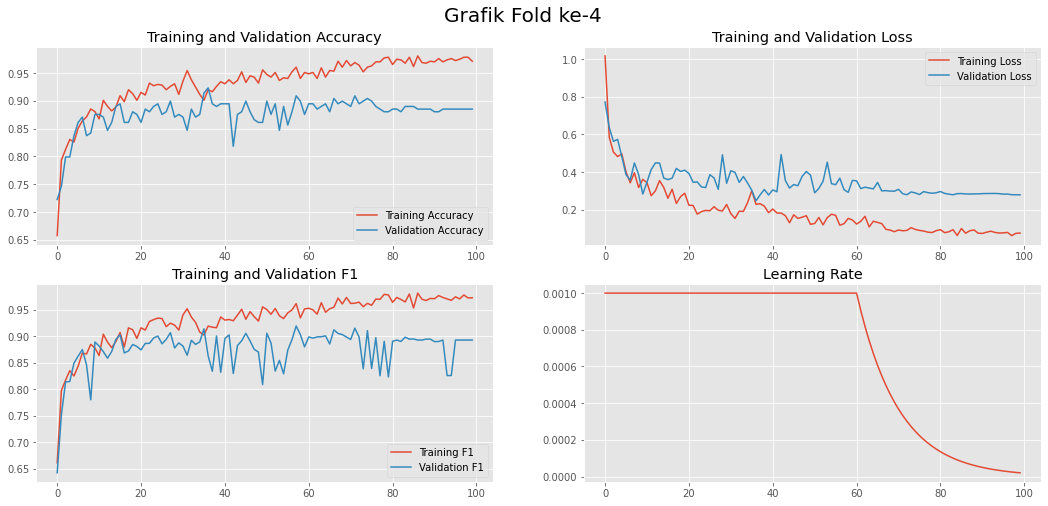


Fold 5/5

Found 838 validated image filenames belonging to 5 classes.
Found 209 validated image filenames belonging to 5 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 15s 448ms/step - loss: 0.9249 - accuracy: 0.6754 - f1: 0.6707 - val_loss: 0.9281 - val_accuracy: 0.6651 - val_f1: 0.6514 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 11s 411ms/step - loss: 0.5741 - accuracy: 0.7959 - f1: 0.8016 - val_loss: 0.7065 - val_accuracy: 0.7560 - val_f1: 0.7765 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 11s 410ms/step - loss: 0.4922 - accuracy: 0.8186 - f1: 0.8280 - val_loss: 0.6209 - val_accuracy: 0.7799 - val_f1: 0.7132 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rat

27/27 [==============================] - 12s 450ms/step - loss: 0.1989 - accuracy: 0.9272 - f1: 0.9200 - val_loss: 0.5070 - val_accuracy: 0.8469 - val_f1: 0.8584 - lr: 0.0010

Epoch 00031: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 31/100
27/27 [==============================] - 12s 429ms/step - loss: 0.2015 - accuracy: 0.9224 - f1: 0.9218 - val_loss: 0.4429 - val_accuracy: 0.8517 - val_f1: 0.8626 - lr: 0.0010

Epoch 00032: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 32/100
27/27 [==============================] - 12s 433ms/step - loss: 0.1705 - accuracy: 0.9439 - f1: 0.9428 - val_loss: 0.4636 - val_accuracy: 0.8421 - val_f1: 0.8480 - lr: 0.0010

Epoch 00033: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 33/100
27/27 [==============================] - 12s 429ms/step - loss: 0.1654 - accuracy: 0.9451 - f1: 0.9476 - val_loss: 0.5015 - val_accuracy: 0.8469 - val_f1: 0.8563 - lr: 0.0010

Epoch 00

27/27 [==============================] - 12s 432ms/step - loss: 0.1022 - accuracy: 0.9594 - f1: 0.9611 - val_loss: 0.4488 - val_accuracy: 0.8612 - val_f1: 0.8767 - lr: 0.0010

Epoch 00061: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 61/100
27/27 [==============================] - 12s 436ms/step - loss: 0.0950 - accuracy: 0.9630 - f1: 0.9574 - val_loss: 0.3911 - val_accuracy: 0.8756 - val_f1: 0.8858 - lr: 0.0010

Epoch 00062: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
Epoch 62/100
27/27 [==============================] - 11s 424ms/step - loss: 0.1389 - accuracy: 0.9463 - f1: 0.9484 - val_loss: 0.4653 - val_accuracy: 0.8612 - val_f1: 0.7975 - lr: 9.0484e-04

Epoch 00063: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
Epoch 63/100
27/27 [==============================] - 11s 421ms/step - loss: 0.1495 - accuracy: 0.9415 - f1: 0.9347 - val_loss: 0.4040 - va

27/27 [==============================] - 12s 429ms/step - loss: 0.0696 - accuracy: 0.9773 - f1: 0.9791 - val_loss: 0.3724 - val_accuracy: 0.8852 - val_f1: 0.8273 - lr: 7.4273e-05

Epoch 00088: LearningRateScheduler setting learning rate to tf.Tensor(6.720541e-05, shape=(), dtype=float32).
Epoch 88/100
27/27 [==============================] - 11s 420ms/step - loss: 0.0901 - accuracy: 0.9714 - f1: 0.9702 - val_loss: 0.3770 - val_accuracy: 0.8804 - val_f1: 0.8939 - lr: 6.7205e-05

Epoch 00089: LearningRateScheduler setting learning rate to tf.Tensor(6.0809965e-05, shape=(), dtype=float32).
Epoch 89/100
27/27 [==============================] - 12s 428ms/step - loss: 0.0807 - accuracy: 0.9714 - f1: 0.9727 - val_loss: 0.3739 - val_accuracy: 0.8852 - val_f1: 0.8942 - lr: 6.0810e-05

Epoch 00090: LearningRateScheduler setting learning rate to tf.Tensor(5.502313e-05, shape=(), dtype=float32).
Epoch 90/100
27/27 [==============================] - 12s 434ms/step - loss: 0.0617 - accuracy: 0.9821 

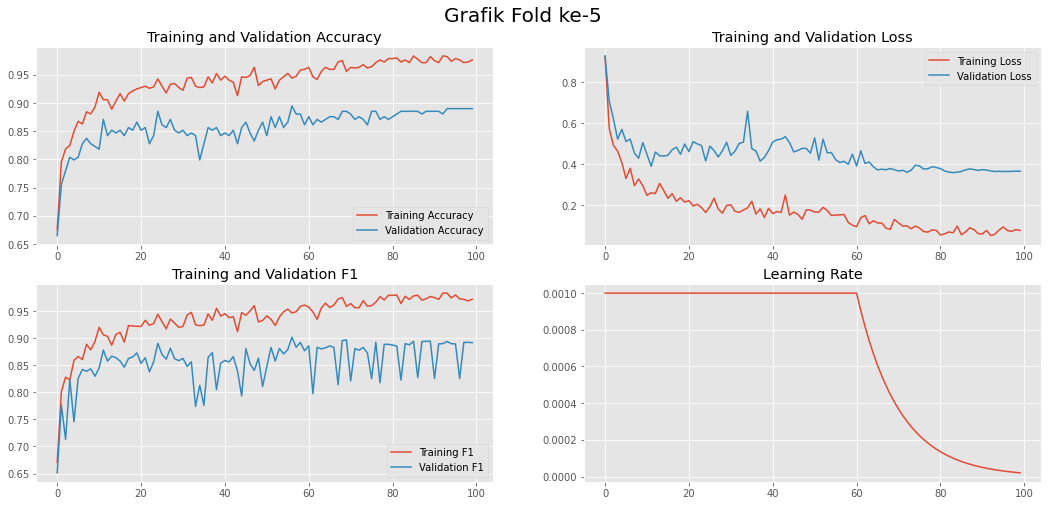

In [193]:
img_size = 180
fold_var = 0
epochs=100
for train_index, val_index in skf.split(X_train, y_train) :
    training_data = X_train.iloc[train_index]
    validation_data = X_train.iloc[val_index]
    
    fold_var += 1
    print("Fold ", fold_var, "/", num_fold, sep='')
    print()
    
    train_generator = train_datagen.flow_from_dataframe(dataframe=training_data,
                                                          x_col="Image path",  
                                                          y_col="Class",  
                                                          target_size=(img_size, img_size),
                                                          batch_size= 32,
                                                          seed = 2022)

    validation_generator = validation_datagen.flow_from_dataframe(dataframe=validation_data,
                                                                    x_col="Image path",
                                                                    y_col="Class",
                                                                    target_size=(img_size, img_size),
                                                                    batch_size=16,
                                                                    seed = 2022)
    
    tf.keras.backend.clear_session()
    model = getModel()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1])
    
#    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#                      filepath='weights-improvement-fold ke%d-{epoch:04d}-{val_f1:.5f}.hdf5'%fold_var,
#                      monitor='val_f1',
#                      mode='max',
#                      save_best_only=True,
#                      verbose=1)

    callbacks = [keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]
    
    history = model.fit(train_generator,
                        epochs=epochs,
                        validation_data=validation_generator,
                        callbacks = callbacks)
    
    accuracy += [history.history['accuracy']]
    val_accuracy += [history.history['val_accuracy']]

    loss += [history.history['loss']]
    val_loss += [history.history['val_loss']]

    f_1 += [history.history['f1']]
    val_f1 += [history.history['val_f1']]
    
    plot_result(history, 
                epochs, 
                "Grafik Fold ke-{}".format(str(fold_var)))
    
#    tf.saved_model.save(model, 
#                        export_dir = 'D:/Latihan/Model save')
    print()

In [194]:
# Provide average scores
mean_loss = []
mean_accuracy = []
mean_val_loss = []
mean_val_accuracy = []
mean_f1 = []
mean_val_f1 = []
print('------------------------------------------------------------------------')
print('Score per Fold')
for i in range(0, fold_var):
    print('----------------------------------------------------------------------------')
    print('> Fold {} - Loss: {} - Accuracy: {}'.format(i+1,np.min(loss[i]), np.max(accuracy[i])))
    print('> Fold {} - Val Loss: {} - Val Accuracy: {}'.format(i+1, np.min(val_loss[i]), np.max(val_accuracy[i])))
    print('> Fold {} - F1: {} - Val F1: {}'.format(i+1, np.max(f_1[i]), np.max(val_f1[i])))
    
    mean_loss.append(np.max(loss[i]))
    mean_accuracy.append(np.max(accuracy[i]))
    mean_val_loss.append(np.max(val_loss[i]))
    mean_val_accuracy.append(np.max(val_accuracy[i]))
    mean_f1.append(np.max(f_1[i]))
    mean_val_f1.append(np.max(val_f1[i]))
    
print('------------------------------------------------------------------------------')
print('Average scores for all folds:')
print('> Loss: {} - Accuracy: {} (+- {})'.format(np.mean(mean_loss), np.mean(mean_accuracy), np.std(mean_accuracy)))
print('> Val Loss: {} - Val Accuracy: {} (+- {})'.format(np.mean(mean_val_loss), np.mean(mean_val_accuracy), np.std(mean_val_accuracy)))
print('> F1: {} - Val F1: {}'.format(np.mean(mean_f1), np.mean(mean_val_f1)))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per Fold
----------------------------------------------------------------------------
> Fold 1 - Loss: 0.370514452457428 - Accuracy: 0.8602150678634644
> Fold 1 - Val Loss: 0.40992873907089233 - Val Accuracy: 0.8428571224212646
> Fold 1 - F1: 0.8584265112876892 - Val F1: 0.8593975901603699
----------------------------------------------------------------------------
> Fold 2 - Loss: 0.4443681240081787 - Accuracy: 0.8494623899459839
> Fold 2 - Val Loss: 0.5942116975784302 - Val Accuracy: 0.8047618865966797
> Fold 2 - F1: 0.845188558101654 - Val F1: 0.809696614742279
----------------------------------------------------------------------------
> Fold 3 - Loss: 0.36058706045150757 - Accuracy: 0.8699284195899963
> Fold 3 - Val Loss: 0.6052552461624146 - Val Accuracy: 0.8133971095085144
> Fold 3 - F1: 0.8751612901687622 - Val F1: 0.8286578059196472
-------------------------------------------------------------------

## Last part from SKFold

In [195]:
train_generator = train_datagen.flow_from_dataframe(dataframe=X_train,
                                                          x_col="Image path",  
                                                          y_col="Class",  
                                                          target_size=(img_size, img_size),
                                                          batch_size= 32,
                                                          seed = 2022)

test_generator = test_datagen.flow_from_dataframe(dataframe=X_test,
                                                  x_col="Image path",
                                                  y_col="Class",
                                                  target_size=(img_size, img_size),
                                                  batch_size=1,
                                                  seed = 2022,
                                                  shuffle = False)

last = getModel()
last.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]
    
history_last = last.fit(train_generator,
                         epochs=100,
                         callbacks = callbacks,
                         validation_data = test_generator)

Found 1047 validated image filenames belonging to 5 classes.
Found 117 validated image filenames belonging to 5 classes.

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
33/33 [==============================] - 20s 505ms/step - loss: 0.9034 - accuracy: 0.6925 - val_loss: 0.9643 - val_accuracy: 0.6410 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
33/33 [==============================] - 15s 468ms/step - loss: 0.5369 - accuracy: 0.8223 - val_loss: 0.7104 - val_accuracy: 0.7778 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
33/33 [==============================] - 16s 488ms/step - loss: 0.4206 - accuracy: 0.8424 - val_loss: 0.5399 - val_accuracy: 0.8205 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/100
33/33 [==============================] - 16s 473ms/step - lo

33/33 [==============================] - 16s 477ms/step - loss: 0.1758 - accuracy: 0.9322 - val_loss: 0.6562 - val_accuracy: 0.8547 - lr: 0.0010

Epoch 00035: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 35/100
33/33 [==============================] - 16s 485ms/step - loss: 0.1888 - accuracy: 0.9341 - val_loss: 0.5782 - val_accuracy: 0.8974 - lr: 0.0010

Epoch 00036: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 36/100
33/33 [==============================] - 16s 490ms/step - loss: 0.1814 - accuracy: 0.9331 - val_loss: 0.6461 - val_accuracy: 0.8889 - lr: 0.0010

Epoch 00037: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 37/100
33/33 [==============================] - 16s 488ms/step - loss: 0.1846 - accuracy: 0.9312 - val_loss: 0.7570 - val_accuracy: 0.8632 - lr: 0.0010

Epoch 00038: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 38/100
33/33 [=========================

33/33 [==============================] - 17s 507ms/step - loss: 0.0949 - accuracy: 0.9628 - val_loss: 0.7002 - val_accuracy: 0.8632 - lr: 5.4881e-04

Epoch 00068: LearningRateScheduler setting learning rate to tf.Tensor(0.0004965851, shape=(), dtype=float32).
Epoch 68/100
33/33 [==============================] - 17s 501ms/step - loss: 0.0802 - accuracy: 0.9771 - val_loss: 0.6920 - val_accuracy: 0.8632 - lr: 4.9659e-04

Epoch 00069: LearningRateScheduler setting learning rate to tf.Tensor(0.00044932874, shape=(), dtype=float32).
Epoch 69/100
33/33 [==============================] - 18s 549ms/step - loss: 0.0982 - accuracy: 0.9647 - val_loss: 0.7507 - val_accuracy: 0.8462 - lr: 4.4933e-04

Epoch 00070: LearningRateScheduler setting learning rate to tf.Tensor(0.00040656942, shape=(), dtype=float32).
Epoch 70/100
33/33 [==============================] - 17s 501ms/step - loss: 0.0870 - accuracy: 0.9675 - val_loss: 0.7002 - val_accuracy: 0.8547 - lr: 4.0657e-04

Epoch 00071: LearningRateSche

33/33 [==============================] - 16s 492ms/step - loss: 0.0728 - accuracy: 0.9771 - val_loss: 0.6909 - val_accuracy: 0.8718 - lr: 2.7324e-05

Epoch 00098: LearningRateScheduler setting learning rate to tf.Tensor(2.4723475e-05, shape=(), dtype=float32).
Epoch 98/100
33/33 [==============================] - 16s 495ms/step - loss: 0.0989 - accuracy: 0.9637 - val_loss: 0.6884 - val_accuracy: 0.8718 - lr: 2.4723e-05

Epoch 00099: LearningRateScheduler setting learning rate to tf.Tensor(2.2370725e-05, shape=(), dtype=float32).
Epoch 99/100
33/33 [==============================] - 17s 501ms/step - loss: 0.0799 - accuracy: 0.9713 - val_loss: 0.6873 - val_accuracy: 0.8632 - lr: 2.2371e-05

Epoch 00100: LearningRateScheduler setting learning rate to tf.Tensor(2.0241867e-05, shape=(), dtype=float32).
Epoch 100/100
33/33 [==============================] - 16s 495ms/step - loss: 0.0703 - accuracy: 0.9771 - val_loss: 0.6850 - val_accuracy: 0.8632 - lr: 2.0242e-05


In [196]:
predictions = last.predict(test_generator)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
print()
k = PrettyTable(['Accuracy Predictions', 'Accuracy Precision', 'Accuracy f1'])
k.add_row([accuracy_score(true_classes, yPredictions), 
            precision_score(true_classes, yPredictions, average='weighted'), 
            f1_score(true_classes, yPredictions, average='weighted')])
print(k)


+----------------------+--------------------+--------------------+
| Accuracy Predictions | Accuracy Precision |    Accuracy f1     |
+----------------------+--------------------+--------------------+
|  0.8632478632478633  | 0.8669160848648028 | 0.8621952635271171 |
+----------------------+--------------------+--------------------+


In [197]:
print(classification_report(test_generator.classes, yPredictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.96      0.96      0.96        25
           2       0.77      0.80      0.78        25
           3       0.94      1.00      0.97        17
           4       0.90      0.72      0.80        25

    accuracy                           0.86       117
   macro avg       0.87      0.87      0.87       117
weighted avg       0.87      0.86      0.86       117



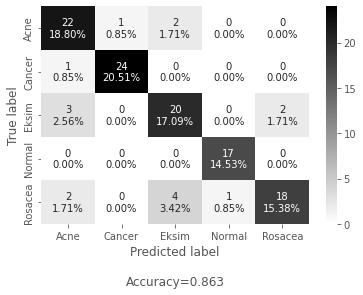

In [198]:
import cf_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(np.array(true_classes, dtype='int64'), np.array(yPredictions))
categories = ['Acne', 'Cancer', 'Eksim', 'Normal', 'Rosacea']
cf_matrix.make_confusion_matrix(confusion_matrix, 
                                categories=categories, 
                                cmap='binary')

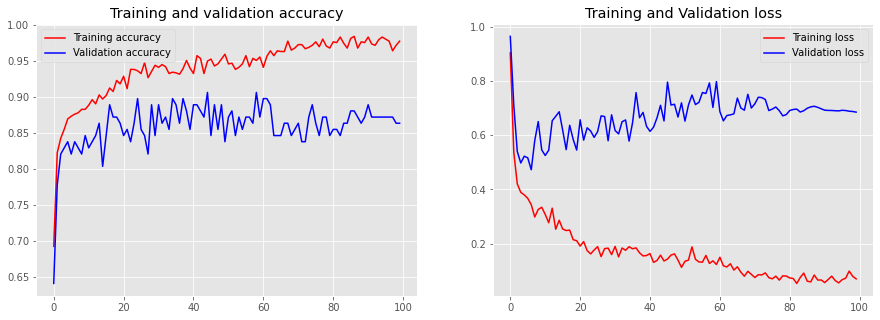

In [199]:
acc = history_last.history['accuracy']
val_acc = history_last.history['val_accuracy']
loss = history_last.history['loss']
val_loss = history_last.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)

plt.show()